_Doug Branton  
Astro 425  
Homework 4_

In [2]:
%pylab inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from scipy.integrate import quad
from skimage.io import imread

Populating the interactive namespace from numpy and matplotlib


## Problem 1.

__a.__ In order to calculate the redshift to distant galaxies, it is useful to consider a photon travelling from a galaxy towards some observer. This allows us to utilize the Doppler Shift, which yields the following relation:

$$ z=\frac{\lambda_{obs}-\lambda_{em}}{\lambda_{em}}=\frac{a(t_0)}{a(t_e)}-1$$

We will use this relation in the form:

$$ 1+z=\frac{a(t_0)}{a(t_e)}$$

Solve for $a(t_e)$ and consider the scale factor for each galaxy relative to the observer:

$$ a(t_e)=\frac{a(t_0)}{(1+z)}=\frac{1}{1+z}$$

$$ a(t_{e,1})=\frac{1}{1+z_1}\ \ \  \& \ \ \ \ a(t_{e,2})=\frac{1}{1+z_2} $$

From here, we can determine the redshift between the galaxies $z_{1,2}$:

$$1+z_{1,2}=\frac{a(t_{e,1})}{a(t_{e,2})}=\frac{1+z_2}{1+z_1}$$

And thus:

$$z_{1,2}=\frac{1+z_2}{1+z_1}-1$$


__b.__ We are considering a flat Einstein-deSitter Universe, which gives the conditions $\Omega_{m}=1$ and consequently, $\omega=0$. We are interested in calculating the angular diameter distance in three scenarios. From the observer to galaxy 1, from the observer to galaxy 2, and from galaxy 1 to galaxy 2. We are additionally given $z_1=0.5$ and $z_2=1.6$.

Start with the definition of angular diameter distance, in the case where the universe is flat:

$$d_A=\frac{S_k(r)}{(1+z)}=\frac{r}{(1+z)}$$

Where r is the comoving distance, which is defined as:

$$r=c\int_{t_e}^{t_o}\frac{dt}{a(t)}$$

For a single component universe with $\omega=0$, this yields (from book):

$$r= \frac{2c}{H_0} \left[1-\frac{1}{\sqrt{1+z}}\right]$$

$$d_A=\frac{2c}{H_0} \left[\frac{1}{1+z}-\frac{1}{(1+z)^{3/2}}\right]$$

In [3]:
#1.b Code
H0=70*u.km/(u.second*u.megaparsec)
H0_s=(H0.to(1/u.second)).value
H0_Gyr=(H0.to(1/u.gigayear)).value
c=(const.c).value

def rs_rel(z_1,z_2):
    """Calculate Relative redshift between two objects with specified redshifts.
    Equation from 1.a"""
    
    return (1+z_2)/(1+z_1)-1.0

def ang_dia_dist(z):
    """Calculate the angular diameter distance for an object at redshift z"""
    
    return ((2*c)/H0_s)*((1.0/(1.0+z))-(1.0/(1.0+z)**(3.0/2.0)))

z_12=rs_rel(0.5,1.6)

print "Angular diameter distance for galaxy 1: ", (ang_dia_dist(0.5)* u.meter).to(u.Mpc)
print "Angular diameter distance for galaxy 2: ", (ang_dia_dist(1.6)* u.meter).to(u.Mpc)
print "Angular diameter distance from galaxy 1 to 2: ", (ang_dia_dist(z_12)* u.meter).to(u.Mpc)

Angular diameter distance for galaxy 1:  1047.86554391 Mpc
Angular diameter distance for galaxy 2:  1251.30844177 Mpc
Angular diameter distance from galaxy 1 to 2:  1188.19351436 Mpc


__c.__ These values are reasonable relative to one another. We expect for larger redshifts (locally, gets fuzzy at large z) to correlate with a larger angular diameter distance as they both measure length. And if we have a larger angular diameter distance, then by $d_A=\frac{l}{\theta}$ we should expect for their size to appear smaller. This is intuitive as our results find that objects viewed over larger distances appear smaller. Their ranking of distance further illustrates this given that the smallest angular diameter distance (to galaxy 1) comes from the smallest redshift, while the distance between the two is next largest and corresponds to a larger redshift and finally the largest angular diameter distance corresponds to the largest redshift.

## Problem 2.

For this problem, we are interested in the galaxy merger rate in the Coma cluster. We have the initial conditions $N \approx 1000$ galaxies within half-mass radius, $r_h \approx 1.5 \ Mpc$, cross-section of a typical galaxy, $\Sigma \approx 10^{-3} \ Mpc^2$ and velocity dispersion $\sigma \approx 880 \ kms^{-3}$

We begin by calculating the mean number density of galaxies within the half-mass radius. This is obtainable using $N$, $r_h$ and the assumption of a spherical galaxy cluster:

$$\bar{n}=\frac{N}{\frac{4}{3}\pi r_h^3}=\frac{1000}{\frac{4}{3}\pi (1.5)^3}=70.736 \ \frac{galaxies}{Mpc^3}$$

Next, we want to consider the mean free path of a galaxy in the Coma cluster. The mean free path is defined below, and we can simply plug in given values:

$$\lambda=\frac{1}{\bar{n}\Sigma}=\frac{1}{70.736*10^{-3}}=14.137 \ Mpc$$

With the mean free path and the velocity dispersion, we use the relation:

$$ \sqrt{<u^2>}=\lambda z$$

where z is the collisional frequency. This simplifies to:

$$ z= \frac{\lambda}{\sqrt{3} \sigma}=\frac{14.137 \ Mpc}{880 \frac{km}{s}}= 2.862*10^{17} \ s=9.075 \ Gyr$$

This collisional frequency z is effectively the average time between collisions for a galaxy in the Coma cluster. This time is less than the hubble time. We can compare this with the collision time between Andromeda (M31) and the Milky	Way. Andromeda is $700 \ kpc$ away and moving towards us as $120 \ kms^{-1}$.

$$t_c = \frac{700 kpc}{120 \frac{km}{s}}=1.799*10^{17} \ s=5.708 \ Gyr$$

As we can see, the average collision time in the Coma cluster is much longer than the collision time between M31 and the Milky Way.

## Problem 3.

Our goal is to create a program that lenses a background source by a foreground mass. We are given the lens equation:

$$\beta = \theta - \frac{D_{LS}}{D_S D_L} \frac{4GM}{c^2 \theta} $$ 

We are considering two cases, the first where the background source is directly behind the lens and the second where the background source is near the edge of the Einstein Ring. We are asked to consider values for the mass of the lens and the distance to the source and the lens. For the mass, strong gravitational lensing is known to occur with galaxy clusters, which present with masses on the order of $1 \times 10^{14} M_{\odot}$. I will be using this order of magnitude estimation for my lense mass. For the distances, I will be using distances on the order of $1 \times 10^8 pc$. This is simply the rough distance to the galaxy cluster Abell 2218. The source distance will be twice the lense distance.

In [386]:
class GravLensing:
    
    def __init__(self,D_l,D_s,M):
        """Initialize parameters"""
        self.G=const.G.value #Gravitational Constant
        self.c=const.c.value #Speed of Light
        self.D_l=((D_l*u.pc).to(u.m)).value #meters
        self.D_s=((D_s*u.pc).to(u.m)).value #meters
        self.D_ls=self.D_s-self.D_l #parsecs
        self.M=((M*u.M_sun).to(u.kg)).value #kg
        self.eins_rad=((4.0*self.G*self.M)/(c**2)*self.D_ls/(self.D_l*self.D_s))**0.5 #Einstein radius in Radians, beta=0
        
    def lens_eqn(self,theta):
        """Lens Equation in terms of the Einstein Radius"""
        #theta-(self.D_ls/(self.D_s*self.D_L))*4.0*self.G*self.M/((c**2)*theta) As stated in problem
        return theta-((self.eins_rad)**2)/theta
    
    def coord_frames(self):
        """Define the coordinate frames that correspond to a lensed and unlensed image"""
        
        #Begin with lensed frame
        field=3 #scalar that defines size of field around einstein radius
        self.x_lensed=np.linspace(-field*self.eins_rad,field*self.eins_rad,num=500)
        print type(self.x_lensed)
        self.y_lensed=np.linspace(-field*self.eins_rad,field*self.eins_rad,num=500)
        self.lensed=np.meshgrid(self.x_lensed,self.y_lensed)
        self.lensed_theta=(self.lensed[0]**2 +self.lensed[1]**2)**0.5 #A length
        self.lensed_angle=np.arctan2(self.lensed[0],self.lensed[1]) #An angle
        
        self.x_lensed=self.lensed[0]
        self.y_lensed=self.lensed[1]
        
        #Unlensed frame
        beta=self.lens_eqn(self.lensed_theta)
        self.x_unlensed=beta*np.cos(self.lensed_angle) #Coordinate transform effect on x, use cosine
        print type(self.x_unlensed)
        self.y_unlensed=beta*np.sin(self.lensed_angle) #Coordinate transform effect on y, use sine
        
    def source_mask(self,r,source_loc):
        '''Create a circular mask centered at the location of the source. This mask creates a source of radius r in the
        unlensed image. We can project this onto the lensed frame to show the lensed image.'''
        s_x,s_y = source_loc
        radius=((self.x_unlensed-s_x)**2+(self.y_unlensed-s_y)**2)**0.5
        return radius<=r
    
    def output(self,r,source_loc,title):
        """Output plot containing the lensed and unlensed images"""
        mask = self.source_mask(r,source_loc)
        angle=np.linspace(0,2*np.pi,num=500)
        einstein_ring=[self.eins_rad*np.cos(angle),self.eins_rad*np.sin(angle)]
        plt.axis('equal')
        plt.grid()
        plt.plot(einstein_ring[0],einstein_ring[1],'--',color='k',label="Einstein Radius")
        plt.title(title)
        plt.xlabel(r'$\theta_{x}$ (Radians)')
        plt.ylabel(r'$\theta_{y}$ (Radians)')
        plt.scatter(self.x_unlensed[mask].ravel(),self.y_unlensed[mask].ravel(),marker=".",color='b',edgecolor=None,label='Unlensed')
        plt.scatter(self.x_lensed[mask].ravel(),self.y_lensed[mask].ravel(),marker=".",color='cyan',edgecolor=None,label='Lensed')
        plt.legend(loc=2,prop={'size':8})
        
    def lensimage(self):
        """Lens an actual image, my method above doesn't seem workable with a direct plug in. Exploring a different method."""
        
        #Read in image
        self.HDF=imread("HubbleDeepField.jpg")[:,:,0]
        w=self.HDF.shape[0]
        h=self.HDF.shape[1]
        
        #Generate Lensed image
        self.HDF_lensed=np.zeros((w,h))
        center=[w/2.0,h/2.0]
        print center
        for i in range(w):
            for j in range(h):
                #count=self.HDF[i,j]
                if (i-center[0]!=0.0) or (j-center[1]!=0.0):
                    beta=(((i-center[0])**2)+((j-center[1])**2))**0.5
                    theta_plus=0.5*(beta+np.sqrt((beta**2)+4*(self.eins_rad**2)))
                    
                    x=(beta/theta)*(i-center[0])
                    y=(beta/theta)*(j-center[1])
                    #x=int(round(x))
                    #y=int(round(y))
                    self.HDF_lensed[(i,j)]=self.HDF[(x+center[0],y+center[1])]
        #Plot images
        fig, (ax1,ax2)=plt.subplots(1,2)
        ax1.imshow(self.HDF,cmap="gray",interpolation="none")
        ax1.set_title("Unlensed Hubble Deep Field")
        ax2.imshow(self.HDF_lensed,cmap="gray",interpolation="none")
        ax2.set_title("Lensed Hubble Deep Field")
        plt.tight_layout()
        
    

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


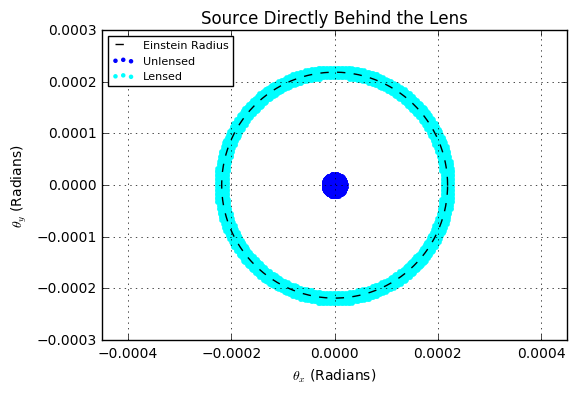

In [387]:
#Part a. Background source is directly behind the lense
lens=GravLensing(2e8,4e8,1e14)
lens.coord_frames()
lens.output(lens.eins_rad*0.1,[0.0,0.0],"Source Directly Behind the Lens")

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


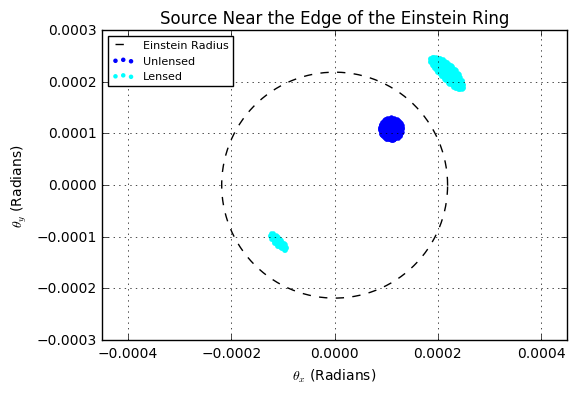

In [388]:
#Part b. Background source is just inside the einstein radius, choose radius of half the einstein radius
lens=GravLensing(2e8,4e8,1e14)
lens.coord_frames()
lens.output(lens.eins_rad*0.1,[0.5*lens.eins_rad,0.5*lens.eins_rad],"Source Near the Edge of the Einstein Ring")

[1050.0, 1150.0]


C:\Users\Doug\Anaconda\Lib\site-packages\ipykernel\__main__.py:84: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


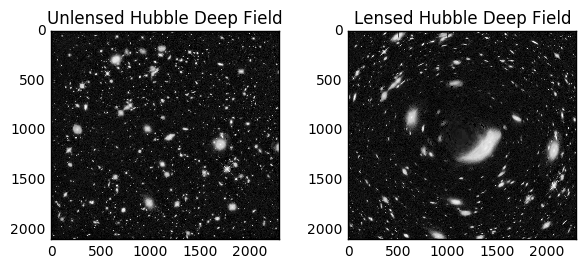

In [389]:
lens=GravLensing(2e8,4e8,1e14)
lens.lensimage()
